In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib.colors import LogNorm
from datetime import datetime
import re
from pyhive import hive
from IPython.core.magic import register_cell_magic
from scipy.interpolate import interp1d

In [2]:
# Handy to preset some plotting style guidelines:

#plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 3
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 24

In [56]:
%%query_hive
SELECT
*
FROM adhoc.spammers_timing_20190313_v2
WHERE block_cnt>=10
AND rand(1)<0.15

Query took: 52.345859 seconds


,spammer_key,block_cnt,first_block_date,10th_block_date,last_block_date,10th_first_delta_days,last_first_delta_days,10p_report_delta_days,25p_report_delta_days,50p_report_delta_days,75p_report_delta_days,90p_report_delta_days
0,---,26,2017-04-17,2017-12-23,2019-03-13,250,695,85.0,215.75,346.5,497.50,588.5
1,INTERNET,32,2018-03-03,2018-03-03,2018-10-29,0,240,0.0,0.00,2.5,18.00,72.7
2,*5069,40,2017-06-04,2017-10-19,2019-02-28,137,634,38.3,145.25,347.5,553.25,615.1
3,+1121201,23,2018-04-16,2018-07-17,2018-11-24,92,222,20.8,55.00,94.0,197.50,217.4
4,+121212121,14,2018-01-04,2018-01-04,2018-01-04,0,0,0.0,0.00,0.0,0.00,0.0
5,+12456,42,2017-04-27,2017-08-05,2019-03-09,100,681,80.3,107.50,297.5,479.50,569.8
6,+1400850671,214,2018-01-29,2018-03-10,2018-09-01,40,215,42.0,71.25,79.0,84.00,87.0
7,+1400862473,12,2017-10-10,2018-04-02,2019-02-28,174,506,1.0,10.75,89.0,144.75,255.0
8,+1800008540,10,2019-02-27,2019-03-01,2019-03-01,2,2,0.0,1.00,1.5,2.00,2.0
9,+2121900009,44,2018-06-19,2018-06-20,2018-07-02,1,13,0.0,1.00,4.0,9.00,9.7


In [57]:
df = _
len(df)

662671

In [58]:
df.head()

,spammer_key,block_cnt,first_block_date,10th_block_date,last_block_date,10th_first_delta_days,last_first_delta_days,10p_report_delta_days,25p_report_delta_days,50p_report_delta_days,75p_report_delta_days,90p_report_delta_days
0,---,26,2017-04-17,2017-12-23,2019-03-13,250,695,85.0,215.75,346.5,497.50,588.5
1,INTERNET,32,2018-03-03,2018-03-03,2018-10-29,0,240,0.0,0.00,2.5,18.00,72.7
2,*5069,40,2017-06-04,2017-10-19,2019-02-28,137,634,38.3,145.25,347.5,553.25,615.1
3,+1121201,23,2018-04-16,2018-07-17,2018-11-24,92,222,20.8,55.00,94.0,197.50,217.4
4,+121212121,14,2018-01-04,2018-01-04,2018-01-04,0,0,0.0,0.00,0.0,0.00,0.0


In [59]:
df.describe()

,block_cnt,10th_first_delta_days,last_first_delta_days,10p_report_delta_days,25p_report_delta_days,50p_report_delta_days,75p_report_delta_days,90p_report_delta_days
count,6.626710e+05,662671.00000,662671.000000,662671.000000,662671.000000,662671.000000,662671.000000,662671.000000
mean,1.345096e+02,128.81787,297.118901,39.831814,79.668210,137.575296,196.938437,239.530576
std,7.062749e+03,162.46660,242.013462,66.924106,96.629478,137.210894,178.796237,207.696023
min,1.000000e+01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+01,11.00000,83.000000,3.000000,11.000000,25.000000,41.000000,54.000000
50%,2.400000e+01,54.00000,244.000000,14.000000,42.000000,88.000000,138.750000,176.900000
75%,5.800000e+01,193.00000,502.000000,46.900000,116.000000,221.500000,331.000000,409.300000
max,5.200703e+06,7598.00000,7609.000000,722.000000,886.000000,902.000000,909.000000,1041.800000


In [60]:
cut = df['block_cnt']>=30
df[cut].describe()

,block_cnt,10th_first_delta_days,last_first_delta_days,10p_report_delta_days,25p_report_delta_days,50p_report_delta_days,75p_report_delta_days,90p_report_delta_days
count,2.850120e+05,285012.000000,285012.000000,285012.000000,285012.000000,285012.000000,285012.000000,285012.000000
mean,2.913322e+02,52.205809,305.053145,44.254982,82.668155,137.490048,193.599079,233.522356
std,1.076740e+04,82.286058,255.469960,71.964810,99.415300,138.300026,179.308561,208.242946
min,3.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000e+01,5.000000,91.000000,4.700000,13.000000,26.500000,42.000000,53.000000
50%,6.900000e+01,18.000000,245.000000,17.200000,44.000000,86.000000,131.000000,164.000000
75%,1.400000e+02,63.000000,505.000000,52.200000,119.000000,219.000000,319.000000,388.700000
max,5.200703e+06,724.000000,7609.000000,722.000000,886.000000,902.000000,909.000000,915.000000


In [61]:
cut = df['block_cnt']>=100
df[cut].describe()

,block_cnt,10th_first_delta_days,last_first_delta_days,10p_report_delta_days,25p_report_delta_days,50p_report_delta_days,75p_report_delta_days,90p_report_delta_days
count,1.008920e+05,100892.000000,100892.000000,100892.000000,100892.000000,100892.000000,100892.000000,100892.000000
mean,7.257870e+02,29.134025,354.543829,50.727287,92.546689,153.168571,215.164297,258.612219
std,1.808927e+04,61.222358,278.970633,76.310101,103.443478,141.931206,183.544336,212.411214
min,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.320000e+02,2.000000,135.000000,7.000000,18.000000,38.000000,59.000000,74.000000
50%,1.930000e+02,8.000000,308.000000,22.800000,54.500000,106.000000,160.000000,198.600000
75%,3.690000e+02,27.000000,572.000000,61.600000,135.000000,244.000000,347.000000,421.000000
max,5.200703e+06,693.000000,7609.000000,704.000000,886.000000,902.000000,909.000000,915.000000


In [70]:
cut = df['block_cnt']>=1000
df[cut].describe()

,block_cnt,10th_first_delta_days,last_first_delta_days,10p_report_delta_days,25p_report_delta_days,50p_report_delta_days,75p_report_delta_days,90p_report_delta_days
count,9.757000e+03,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000
mean,5.209825e+03,17.288511,586.591678,79.818971,142.568617,232.762888,331.562570,398.060131
std,5.797748e+04,50.740665,438.054048,90.951942,114.210487,150.456565,195.270074,224.913491
min,1.000000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.282000e+03,0.000000,408.000000,18.000000,46.000000,98.000000,153.000000,203.000000
50%,1.930000e+03,2.000000,658.000000,57.000000,136.750000,246.000000,347.000000,422.200000
75%,3.543000e+03,9.000000,730.000000,100.000000,201.000000,346.500000,518.000000,624.000000
max,5.200703e+06,688.000000,7609.000000,689.000000,692.000000,700.000000,791.000000,868.000000


In [36]:
df.columns[1:]

Index(['block_cnt', 'first_block_date', '10th_block_date', 'last_block_date',
       '10th_first_delta_days', 'last_first_delta_days',
       '10p_report_delta_days', '25p_report_delta_days',
       '50p_report_delta_days', '75p_report_delta_days',
       '90p_report_delta_days'],
      dtype='object')

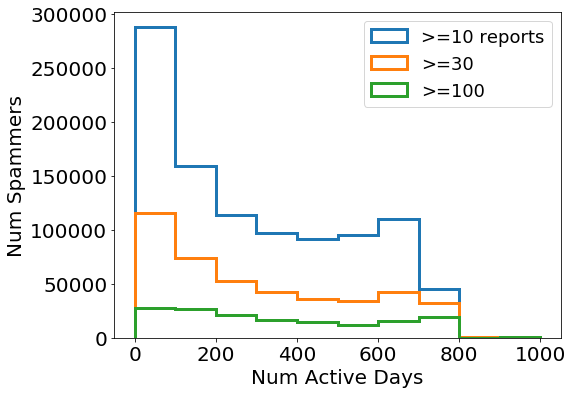

In [39]:
# Plots
plt.figure(figsize=(8,6))
#plt.xscale('log')
plt.ylabel('Num Spammers')
plt.xlabel('Num Active Days')

yval = 'last_first_delta_days'
plt.hist(np.clip(df[yval],0,1000),histtype='step',lw=3,label='>=10 reports')
cut = df['block_cnt']>=30
plt.hist(np.clip(df[cut][yval],0,1000),histtype='step',lw=3,label='>=30')
cut = df['block_cnt']>=100
plt.hist(np.clip(df[cut][yval],0,1000),histtype='step',lw=3,label='>=100')

plt.legend(loc='best',prop={"size": 18})
plt.show()

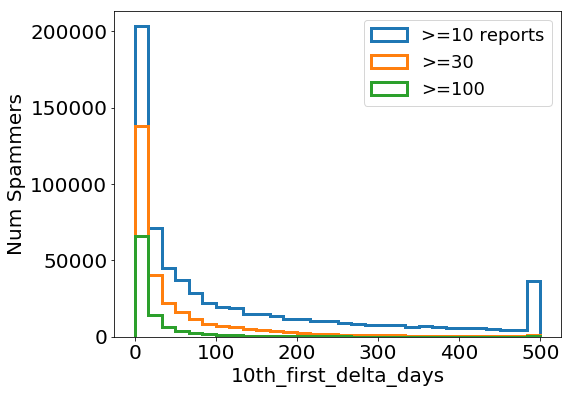

In [69]:
# Plots
plt.figure(figsize=(8,6))
#plt.xscale('log')
plt.ylabel('Num Spammers')
yval = '10th_first_delta_days'
plt.xlabel(yval)

nbins = 30
cap = 500
plt.hist(np.clip(df[yval],0,cap),bins=nbins,histtype='step',lw=3,label='>=10 reports')
cut = df['block_cnt']>=30
plt.hist(np.clip(df[cut][yval],0,cap),bins=nbins,histtype='step',lw=3,label='>=30')
cut = df['block_cnt']>=100
plt.hist(np.clip(df[cut][yval],0,cap),bins=nbins,histtype='step',lw=3,label='>=100')

plt.legend(loc='best',prop={"size": 18})
plt.show()

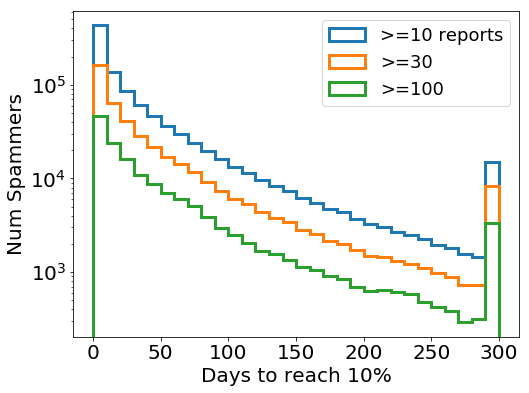

In [48]:
# Plots
plt.figure(figsize=(8,6))
plt.yscale('log')
plt.ylabel('Num Spammers')
plt.xlabel('Days to reach 10%')
nbins = 30

yval = '10p_report_delta_days'
cap = 300
plt.hist(np.clip(df[yval],0,cap),bins=nbins,histtype='step',lw=3,label='>=10 reports')
cut = df['block_cnt']>=30
plt.hist(np.clip(df[cut][yval],0,cap),bins=nbins,histtype='step',lw=3,label='>=30')
cut = df['block_cnt']>=100
plt.hist(np.clip(df[cut][yval],0,cap),bins=nbins,histtype='step',lw=3,label='>=100')

plt.legend(loc='best',prop={"size": 18})
plt.show()

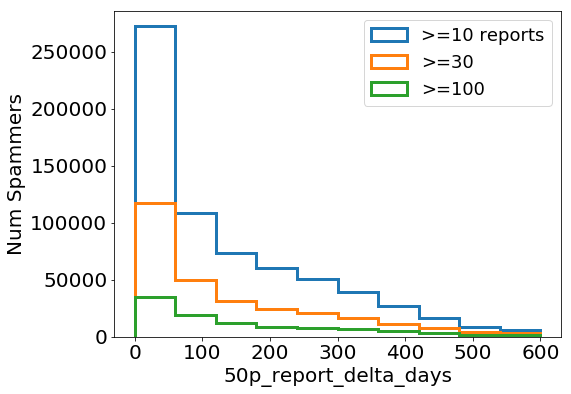

In [66]:
# Plots
plt.figure(figsize=(8,6))
#plt.xscale('log')
plt.ylabel('Num Spammers')
yval = '50p_report_delta_days'
plt.xlabel(yval)

cap = 600
plt.hist(np.clip(df[yval],0,cap),histtype='step',lw=3,label='>=10 reports')
cut = df['block_cnt']>=30
plt.hist(np.clip(df[cut][yval],0,cap),histtype='step',lw=3,label='>=30')
cut = df['block_cnt']>=100
plt.hist(np.clip(df[cut][yval],0,cap),histtype='step',lw=3,label='>=100')

plt.legend(loc='best',prop={"size": 18})
plt.show()

In [45]:
df['back_half_days'] = df['last_first_delta_days']-df['50p_report_delta_days']

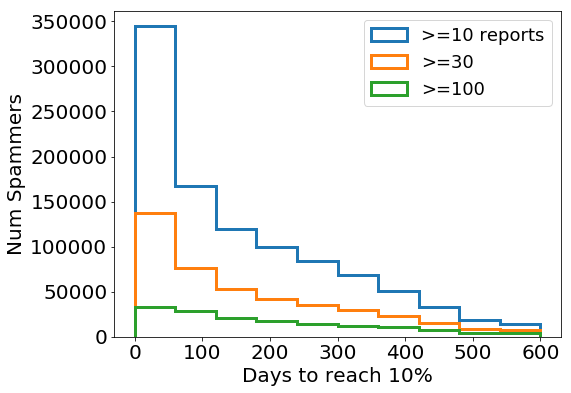

In [46]:
# Plots
plt.figure(figsize=(8,6))
#plt.xscale('log')
plt.ylabel('Num Spammers')
plt.xlabel('Days to reach 10%')

yval = 'back_half_days'
cap = 600
plt.hist(np.clip(df[yval],0,cap),histtype='step',lw=3,label='>=10 reports')
cut = df['block_cnt']>=30
plt.hist(np.clip(df[cut][yval],0,cap),histtype='step',lw=3,label='>=30')
cut = df['block_cnt']>=100
plt.hist(np.clip(df[cut][yval],0,cap),histtype='step',lw=3,label='>=100')

plt.legend(loc='best',prop={"size": 18})
plt.show()